<b>¡Hola Alejandro!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

______________

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
import lightgbm as lgb
from catboost import Pool, CatBoostRegressor
from scipy.stats import randint, uniform

In [2]:
df=pd.read_csv("/datasets/taxi.csv")

In [3]:
print(df.head())
print()
print(df.shape)
print()
print(df.info())
print()
print(df.describe())

              datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32

(26496, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None

         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000


In [4]:
print(df.isnull().sum())
print()
print(df.duplicated().sum())

datetime      0
num_orders    0
dtype: int64

0


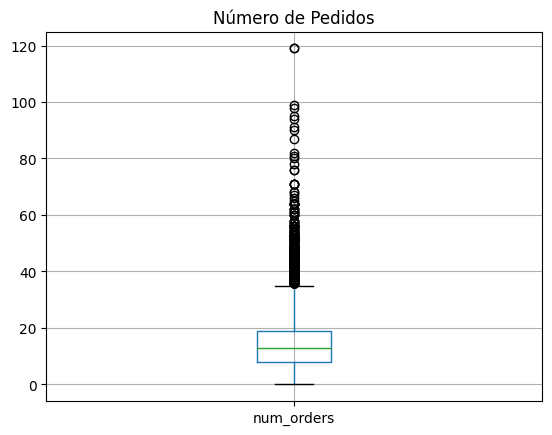

In [5]:
df.boxplot('num_orders')
plt.title('Número de Pedidos')
plt.show()

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has importado correctamente las bibliotecas necesarias y cargado el conjunto de datos sin errores. También realizaste un buen manejo inicial de los datos al verificar los valores ausentes y duplicados. Excelente trabajo identificando que no había problemas de este tipo en tu dataset.</div>

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El análisis descriptivo que incluiste proporciona un buen resumen de los datos. La tabla con las estadísticas clave de la columna `num_orders` y el uso de gráficos (como el boxplot) ayudan a visualizar la distribución de los pedidos de taxis.</div> <div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Si bien incluiste un análisis visual mediante gráficos, podrías ampliar tu análisis con una interpretación más detallada de estos. Por ejemplo, comentar sobre la posible presencia de outliers o patrones estacionales observados en el boxplot o en las descomposiciones temporales.</div>

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'],format = '%Y-%m-%d %H:%M:%S')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [7]:
df.sort_values(by='datetime',ascending=True, inplace=True)

df.set_index('datetime',inplace=True)

print(df.head())
print(df.tail())

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
                     num_orders
datetime                       
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53


En esta primera etapa importamos el dataframe y observamos su extensión, cambiamos verificamos valores ausentes (0) y filas duplicadas(0), de igual manera podemos observar despues de ordenar los datos que contamos con información desde el 1 de marzo del 2018 hasta el 31 de agosto del mismo año en un intervalo de 10 minutos.  

## Análisis

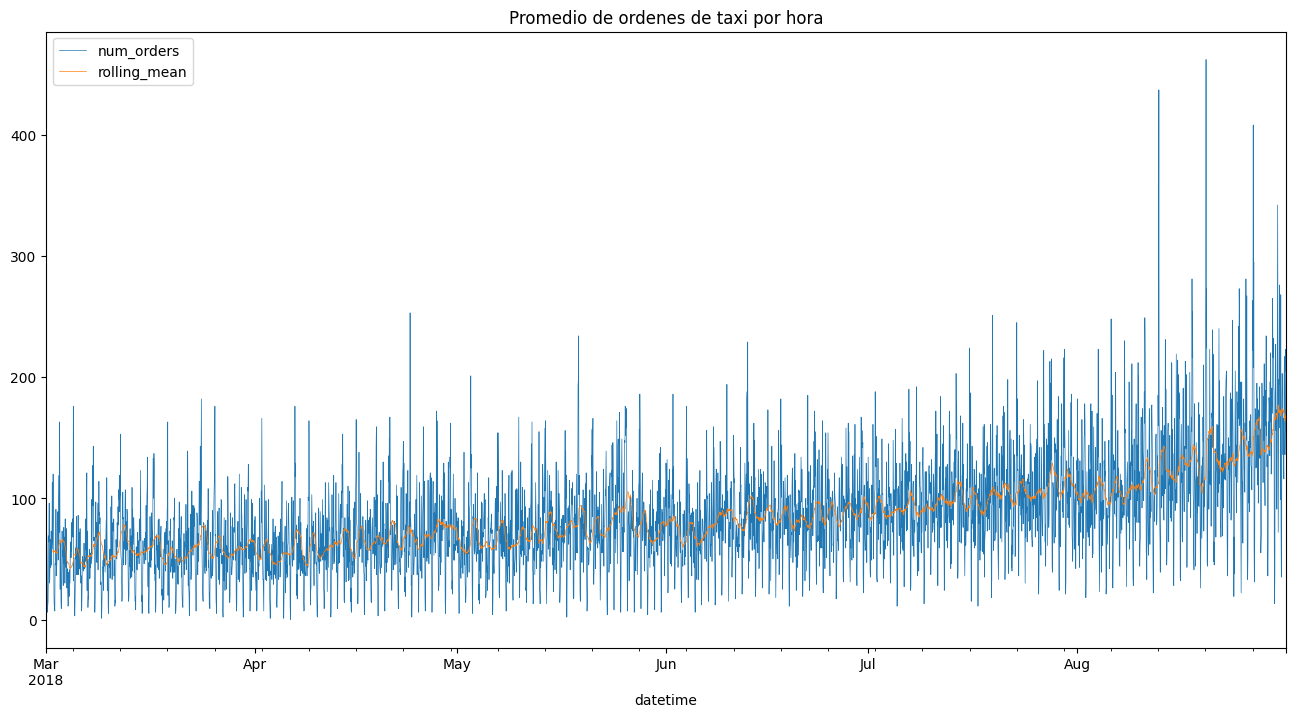

In [8]:
df = df.resample('1H').sum()
df['rolling_mean'] = df['num_orders'].shift().rolling(24).mean()
df.plot(figsize=(16,8), lw="0.5")
plt.title('Promedio de ordenes de taxi por hora')
plt.show()

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El uso de `resample()` para convertir los datos a intervalos de una hora está correctamente implementado. También has incluido correctamente la creación de características de retraso (lags), lo cual es crucial para modelos de series temporales. Buen trabajo al usar el `shift()` para generar estas variables.</div> 

Text(0.5, 1.0, 'Residual Component')

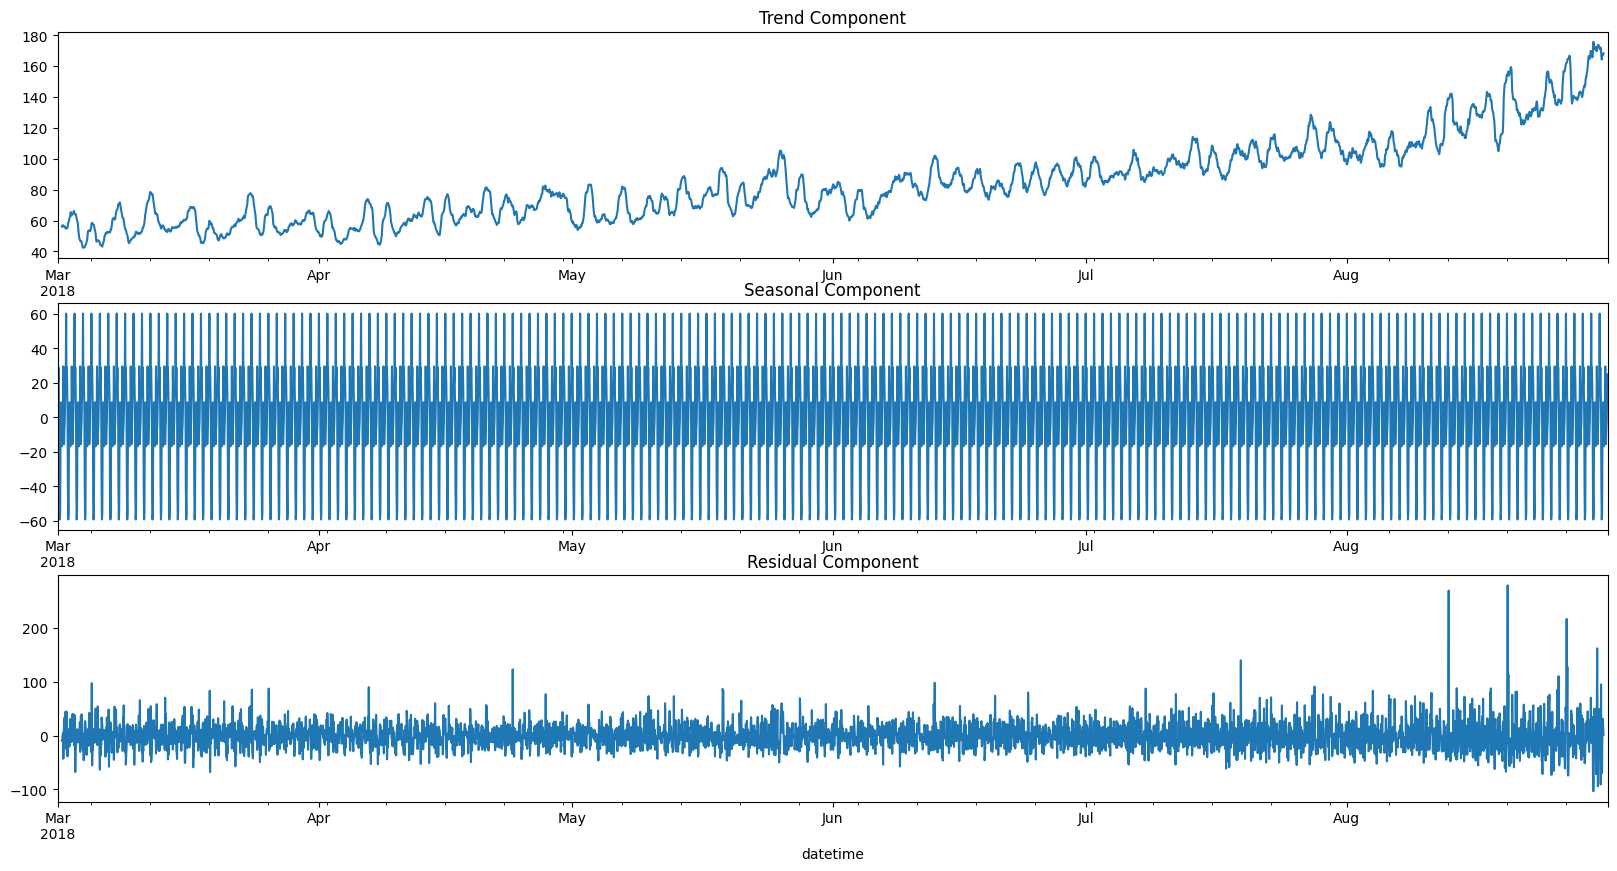

In [9]:
decomposed_series = seasonal_decompose(df["num_orders"], period = 24)

plt.figure(figsize=(20,10))
plt.subplot(311)
decomposed_series.trend.plot(ax=plt.gca())
plt.title("Trend Component")

print()

plt.subplot(312)
decomposed_series.seasonal.plot(ax=plt.gca())
plt.title("Seasonal Component")

print()

plt.subplot(313)
decomposed_series.resid.plot(ax=plt.gca())
plt.title("Residual Component")

In [10]:
df.groupby(df.index.hour)['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
0,184.0,144.402174,49.224380,42.0,104.00,142.0,167.50,281.0
1,184.0,104.364130,47.611853,33.0,73.00,93.5,124.25,273.0
2,184.0,113.070652,65.815443,20.0,68.75,104.5,146.00,462.0
3,184.0,102.021739,44.282125,24.0,68.00,96.5,128.00,267.0
4,184.0,86.907609,52.755930,15.0,43.00,83.0,117.00,295.0
5,184.0,42.630435,26.754997,1.0,20.75,37.5,61.25,121.0
6,184.0,25.173913,21.288345,0.0,9.00,19.0,35.00,95.0
7,184.0,29.271739,15.869759,5.0,18.00,27.0,38.00,103.0
8,184.0,73.048913,24.663258,25.0,58.00,71.5,85.00,182.0


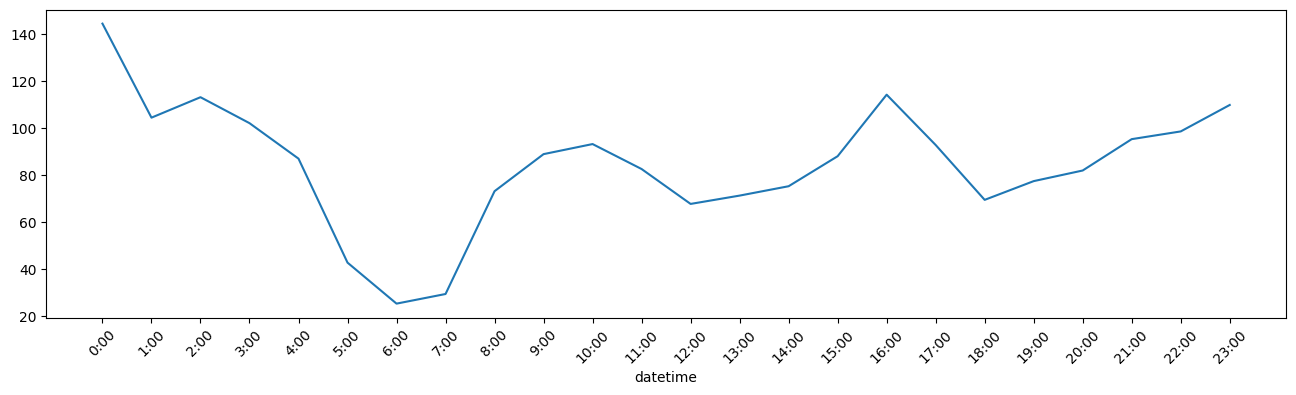

In [11]:
df.groupby(df.index.hour)['num_orders'].mean().plot(figsize=(16,4))
plt.xticks(ticks=range(24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)
plt.show()

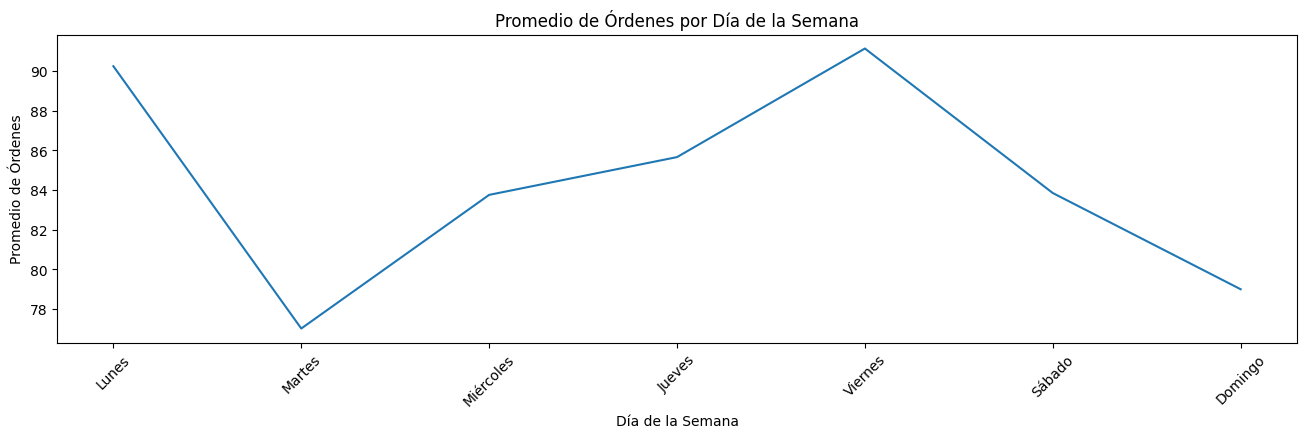

In [12]:
mean_orders_per_weekday = df.groupby(df.index.weekday)['num_orders'].mean()

plt.figure(figsize=(16, 4))
mean_orders_per_weekday.plot()
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.xticks(ticks=range(7), labels=days, rotation=45)

plt.title('Promedio de Órdenes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Órdenes')

plt.show()

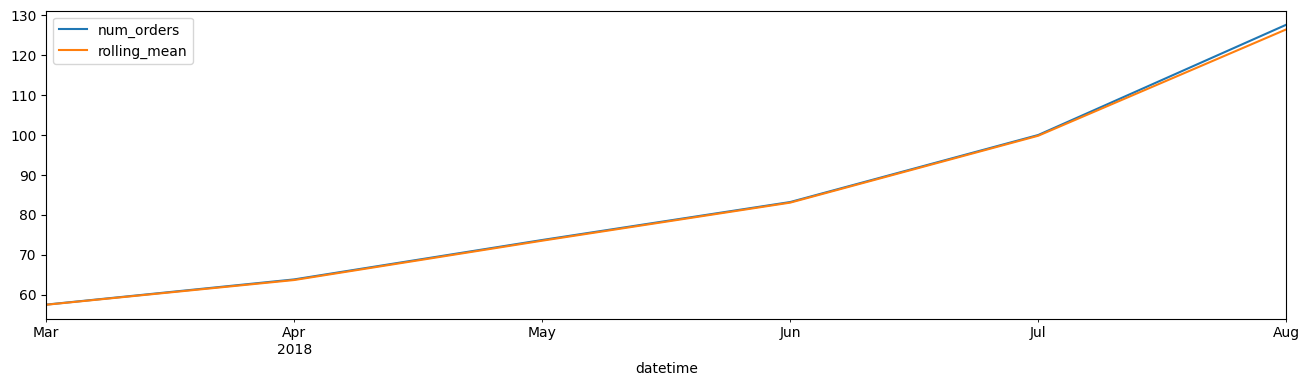

In [13]:
df.resample('M').mean().plot(figsize=(16,4))
plt.show()

En esta segunda etapa usamos el método resample para ordenar los datos por hora como es solicitado, de igual manera descompusimos la información donde podemos observar un incremento de las ordenes conforme avanzan los meses, mientras que al agrupar hora y día encontramos que entre 10:00pm y 12:00am hay una fuerte demanda de taxis que disminuye paulatinamente hasta encontrar su punto mas bajo a las 6:00am. Desde ese momento vuelve a incrementar encontrando dos horarios mas significativos de demanda a entre las 9:00am y 10:00am, pero también entre las 3:00pm y 5:00pm. Al observar los datos por dia encontramos que los dias de mayor demanda son lunes y viernes, mientras que los de menor demanda los encontramos en martes y domingo.   

## Formación

In [14]:
df['month'] = df.index.month      
df['day'] = df.index.day            
df['dayofweek'] = df.index.dayofweek 
df['hour'] = df.index.hour   

In [15]:

max_lag = 4

for lag in range(1, max_lag + 1):
    df['lag_{}'.format(lag)] = df['num_orders'].shift(lag) 


print(df.head(20))

                     num_orders  rolling_mean  month  day  dayofweek  hour  \
datetime                                                                     
2018-03-01 00:00:00         124           NaN      3    1          3     0   
2018-03-01 01:00:00          85           NaN      3    1          3     1   
2018-03-01 02:00:00          71           NaN      3    1          3     2   
2018-03-01 03:00:00          66           NaN      3    1          3     3   
2018-03-01 04:00:00          43           NaN      3    1          3     4   
2018-03-01 05:00:00           6           NaN      3    1          3     5   
2018-03-01 06:00:00          12           NaN      3    1          3     6   
2018-03-01 07:00:00          15           NaN      3    1          3     7   
2018-03-01 08:00:00          34           NaN      3    1          3     8   
2018-03-01 09:00:00          69           NaN      3    1          3     9   
2018-03-01 10:00:00          64           NaN      3    1       

In [16]:
df = df.dropna() 

target = df["num_orders"]
features = df.drop(["num_orders", "rolling_mean"],axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, shuffle=False)
print("train shape: ", features_train.shape)
print("test shape: ", features_test.shape)

train shape:  (3952, 8)
test shape:  (440, 8)


In [17]:
df = df.copy()

scaler = MaxAbsScaler()

columnas_numericas = ['month', 'day', 'dayofweek', 'hour','lag_1', 'lag_2', 'lag_3', 'lag_4']

df.loc[:, columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

print(df.head())

                     num_orders  rolling_mean  month       day  dayofweek  \
datetime                                                                    
2018-03-02 00:00:00          90     56.833333  0.375  0.064516   0.666667   
2018-03-02 01:00:00         120     55.416667  0.375  0.064516   0.666667   
2018-03-02 02:00:00          75     56.875000  0.375  0.064516   0.666667   
2018-03-02 03:00:00          64     57.041667  0.375  0.064516   0.666667   
2018-03-02 04:00:00          20     56.958333  0.375  0.064516   0.666667   

                         hour     lag_1     lag_2     lag_3     lag_4  
datetime                                                               
2018-03-02 00:00:00  0.000000  0.125541  0.244589  0.142857  0.132035  
2018-03-02 01:00:00  0.043478  0.194805  0.125541  0.244589  0.142857  
2018-03-02 02:00:00  0.086957  0.259740  0.194805  0.125541  0.244589  
2018-03-02 03:00:00  0.130435  0.162338  0.259740  0.194805  0.125541  
2018-03-02 04:00:00  0.17391

## Prueba

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has entrenado correctamente los modelos de regresión lineal y árboles de decisión, logrando un RMSE respetable por debajo de 48 en ambos casos. Además, es positivo ver que usaste técnicas de optimización como `GridSearchCV` para ajustar los hiperparámetros en el modelo de árboles de decisión.</div>

### LinearRegression

In [18]:
X = df.drop("num_orders", axis=1)
y = df["num_orders"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE LinearRegression: {rmse:.2f}")

RMSE LinearRegression: 31.11


### DecisionTreeRegressor

In [19]:
modelo = DecisionTreeRegressor(random_state=8)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE Modelo DecisionTreeRegressor sin Hiperparámetros:{rmse:.2f}")


RMSE Modelo DecisionTreeRegressor sin Hiperparámetros:31.39


### DecisionTreeRegressor con GridSearchCV

In [20]:
modelo_dt = DecisionTreeRegressor(random_state=8)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=modelo_dt, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

mejor_modelo = grid_search.best_estimator_

y_pred_dt = mejor_modelo.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"RMSE (Decision Tree Regressor optimizado): {rmse_dt:.2f}")

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE (Decision Tree Regressor optimizado): 28.02


### LigthGBM

In [ ]:
modelo_lgb = lgb.LGBMRegressor(random_state=8)

param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=modelo_lgb, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

mejor_modelo_lgb = grid_search.best_estimator_

y_pred_lgb = mejor_modelo_lgb.predict(X_test)

rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"RMSE (LightGBM optimizado): {rmse_lgb:.2f}")

### CatBoostRegressor 

In [ ]:
modelo_cat = CatBoostRegressor(silent=True, random_state=8)

param_dist = {
    'depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.1), 
    'iterations': randint(100, 500),
    'l2_leaf_reg': uniform(1, 10)
}

random_search = RandomizedSearchCV(estimator=modelo_cat, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=50, cv=3, n_jobs=-1, random_state=8)

random_search.fit(X_train, y_train)

mejor_modelo_cat = random_search.best_estimator_

y_pred_cat = mejor_modelo_cat.predict(X_test)

rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

print(f"Mejores parámetros: {random_search.best_params_}")
print(f"RMSE (CatBoost optimizado): {rmse_cat:.2f}")

<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Has utilizado correctamente `train_test_split` con `shuffle=False`, lo que asegura que no se mezclen los datos futuros con los pasados, respetando la naturaleza secuencial de los datos de series temporales. **Esto es válido** y cumple con los requisitos del proyecto.
Sin embargo, para obtener una evaluación aún más robusta, podrías considerar el uso de validación cruzada temporal con TimeSeriesSplit. Esto te permitirá evaluar cómo se comporta tu modelo en diferentes segmentos de tiempo, en lugar de solo evaluar su rendimiento en un único periodo de prueba.

Al utilizar TimeSeriesSplit, dividirías tus datos en varias porciones temporales y el modelo se evaluaría en diferentes segmentos, simulando predicciones en periodos futuros con más precisión. Esta técnica es especialmente útil si los datos muestran patrones que cambian a lo largo del tiempo, como estacionalidad o tendencias a largo plazo. Aquí tienes un ejemplo de cómo implementar esta técnica:


    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
Si decides implementar esto, podrías obtener una visión más precisa de cómo tu modelo generaliza a diferentes periodos temporales. No es un error crítico no utilizar esta técnica, pero te ayudará a fortalecer el análisis.

</div>

### Conclusiones.

Para comparar diferentes modelos y ajustes de parámetros se usaron: LinearRegression sin ajuste de parámetros con un RMSE de 31.11, DecisionTreeRegressor sin Hiperparámetros con un RMSE de 31.39, al buscar los mejores parámetros para este modelo usando GridSearchCV encontramos: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
con un RMSE (Decision Tree Regressor optimizado): 28.02. adicional a esto se uso ligthgbm cuyos mejores parámetros fueron:{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31} RMSE (LightGBM optimizado): 22.04 y CatboostRegressor cuyos mejores parámetros fueron : {'depth': 5, 'iterations': 443, 'l2_leaf_reg': 6.489204193042689, 'learning_rate': 0.10713392685359518} con un RMSE (CatBoost optimizado): 21.46, siendo este el mejor modelo.

En todos los modelos se cumple el requisito marcado de un RMSE menor de 48

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has hecho una buena comparación entre los modelos y proporcionaste una conclusión clara: el modelo de CatBoost fue el mejor en cuanto a rendimiento (RMSE más bajo). También se cumplió el objetivo del proyecto (RMSE < 48).</div>

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> ¡Buen trabajo, Alejandro! Lograste implementar varias técnicas avanzadas de modelado y optimización. Te recomendaría realizar una validación cruzada temporal en el futuro, ya que trabajas con datos de series temporales, y añadir más análisis visuales y explicaciones detalladas sobre tus resultados. En general, tu proyecto cumple con los requisitos y es claro que dominas bien las herramientas.</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  	
Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48